# CASE STUDY: FASHION CLASS CLASSIFICATION

# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

# STEP #2: IMPORTING DATA

In [15]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
#Create the dataframes
fashion_train_df = pd.read_csv('datasets/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('datasets/fashion-mnist_test.csv', sep=',')

# STEP #3: VISUALIZATION OF THE DATASET

In [7]:
#Visualize the train dataset
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Visualize the test dataset
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [11]:
fashion_train_df.shape

(60000, 785)

In [12]:
fashion_test_df.shape

(10000, 785)

In [13]:
#Create train and test arrays
training = np.array(fashion_train_df, dtype= 'float32')
testing = np.array(fashion_test_df, dtype= 'float32')

9.0

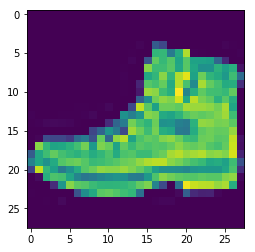

In [28]:
#Visualize one random image
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i, 0]
label

#The 10 classes:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

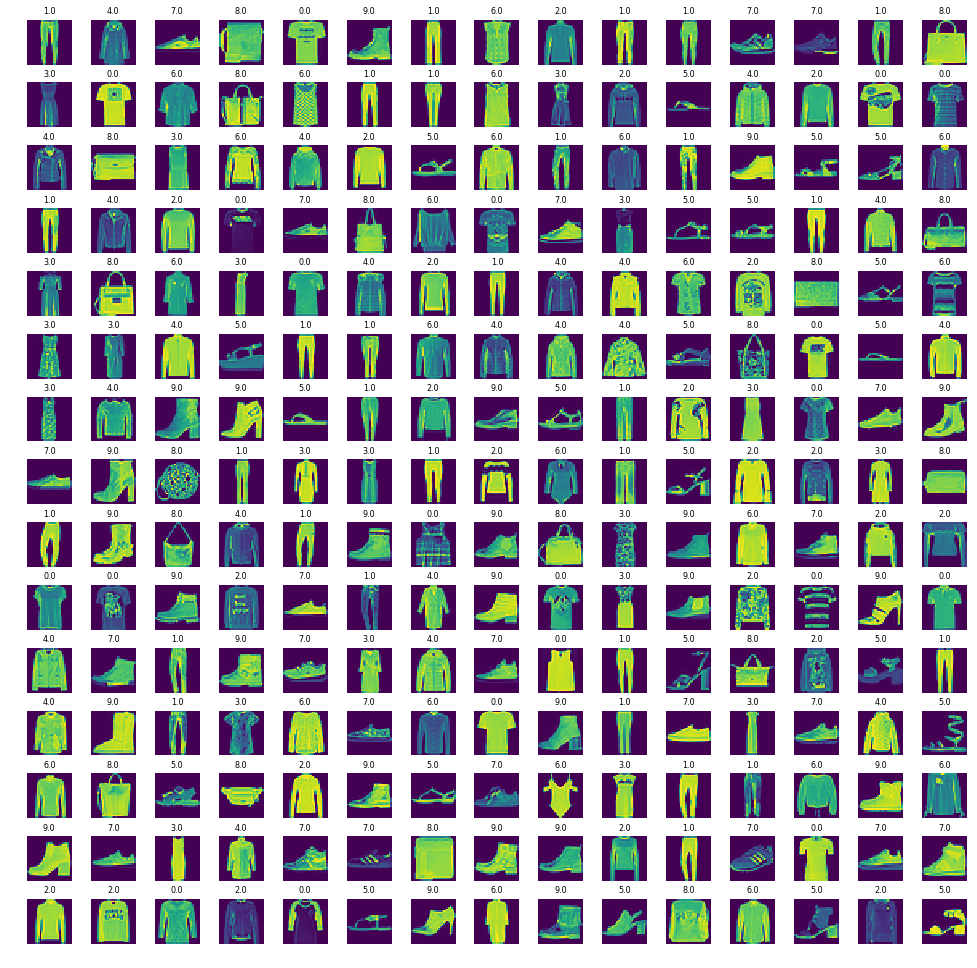

In [29]:
# View some randome images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

# Flaten the 15 x 15 matrix into 225 array
axes = axes.ravel() 

# Get the length of the training dataset
n_training = len(training) 

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):

    index = np.random.randint(0, n_training)
    # Read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# The 10 classes:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# STEP #4: TRAINING THE MODEL

In [30]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:, 0]

X_test = testing[:,1:]/255
y_test = testing[:, 0]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 123)

In [33]:
X_train.shape

(48000, 784)

In [34]:
# Reshaping 
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [35]:
X_train.shape

(48000, 28, 28, 1)

In [36]:
X_test.shape

(10000, 28, 28, 1)

In [37]:
X_validate.shape

(12000, 28, 28, 1)

In [38]:
#Building the model
import keras

Using TensorFlow backend.


In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [42]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3) , input_shape= (28,28,1), activation= 'relu'))

In [43]:
cnn_model.add(MaxPooling2D(pool_size= (2,2)))

In [44]:
cnn_model.add(Flatten())

In [47]:
cnn_model.add(Dense(units = 32, activation = 'relu'))

In [48]:
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [49]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [50]:
epochs = 50
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

/Users/Ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 224s 5ms/step - loss: 0.9828 - acc: 0.6638 - val_loss: 0.5439 - val_acc: 0.8034
Epoch 2/50
48000/48000 [==============================] - 204s 4ms/step - loss: 0.4822 - acc: 0.8320 - val_loss: 0.4639 - val_acc: 0.8327
Epoch 3/50
48000/48000 [==============================] - 201s 4ms/step - loss: 0.4233 - acc: 0.8531 - val_loss: 0.4031 - val_acc: 0.8577
Epoch 4/50
48000/48000 [==============================] - 200s 4ms/step - loss: 0.3806 - acc: 0.8673 - val_loss: 0.3760 - val_acc: 0.8688
Epoch 5/50
48000/48000 [==============================] - 199s 4ms/step - loss: 0.3570 - acc: 0.8749 - val_loss: 0.3526 - val_acc: 0.8755
Epoch 6/50
48000/48000 [==============================] - 192s 4ms/step - loss: 0.3362 - acc: 0.8828 - val_loss: 0.3378 - val_acc: 0.8808
Epoch 7/50
48000/48000 [==============================] - 192s 4ms/step - loss: 0.3195 - acc: 0.8889 - val_loss: 0.3356 - 

# STEP #5: EVALUATING THE MODEL

In [51]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 16s 2ms/step
Test Accuracy : 0.911


In [59]:
# Get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

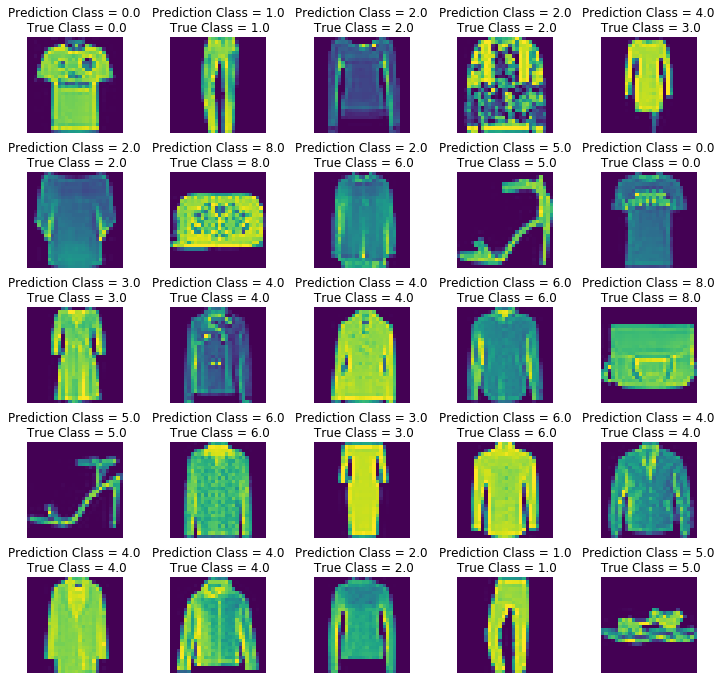

In [60]:
#Visualize some predicted results
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

array([[832,   2,  22,  16,   2,   0, 114,   0,  12,   0],
       [  0, 982,   2,   8,   4,   0,   1,   0,   3,   0],
       [ 10,   2, 879,  10,  61,   0,  37,   0,   1,   0],
       [ 11,   9,   9, 919,  27,   0,  24,   0,   1,   0],
       [  0,   2,  54,  19, 892,   0,  33,   0,   0,   0],
       [  0,   1,   0,   0,   0, 968,   0,  20,   2,   9],
       [ 92,   1,  63,  30,  71,   0, 736,   0,   7,   0],
       [  0,   0,   0,   0,   0,  13,   0, 964,   0,  23],
       [  3,   2,   2,   2,   3,   4,   7,   3, 974,   0],
       [  0,   0,   0,   0,   0,   7,   0,  30,   0, 963]])

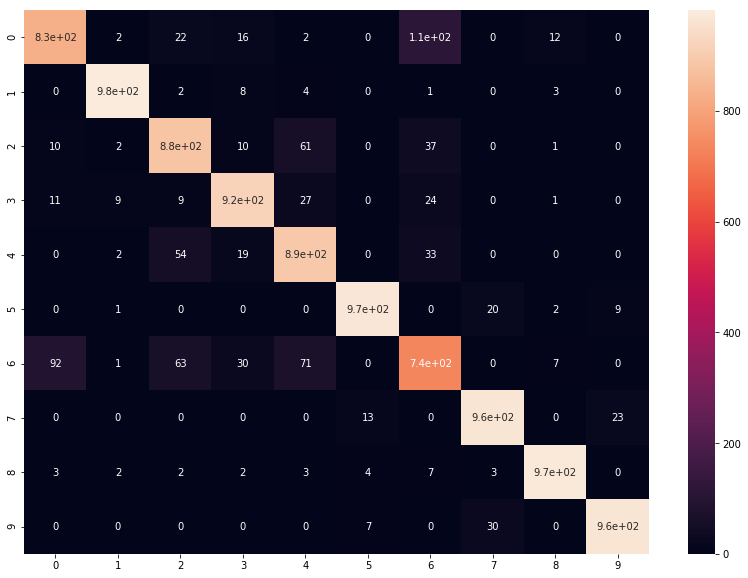

In [63]:
#Create the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
display(cm)
#Visualize the confusion matrix in an heat map
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [65]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

# The 10 classes:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

              precision    recall  f1-score   support

     Class 0       0.88      0.83      0.85      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.85      0.88      0.87      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.84      0.89      0.87      1000
     Class 5       0.98      0.97      0.97      1000
     Class 6       0.77      0.74      0.75      1000
     Class 7       0.95      0.96      0.96      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.97      0.96      0.97      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

